## Importing packages

In [149]:
from tika import parser
import re
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import re
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

## Importing Data

In [150]:
raw_bjp = parser.from_file('Bjp-Election-2019-Manifesto-English.pdf')
#print(raw_bjp['content'])

In [151]:
raw_cong = parser.from_file('Congress_manifesto_english.pdf')
#print(raw_cong['content'])

In [152]:
text_bjp = raw_bjp['content']
text_cong = raw_cong['content']

In [153]:
#text =  text.encode('ascii','ignore').lower()

Understanding the text - Number of words

In [154]:
print('Length of BJPs Manifisto - ',len(text_bjp))
print('Length of words in Congress Manifisto - ',len(text_cong))

Length of BJPs Manifisto -  117197
Length of words in Congress Manifisto -  150049


Removing Special Characters

In [155]:
text1_bjp = re.sub('[^A-Za-z0-9]+', ' ', text_bjp) # Removing special characters extra spaces
text1_cong = re.sub('[^A-Za-z0-9]+', ' ', text_cong) # Removing special characters extra spaces

Now again seeing Number of Words

In [156]:
print('Length of BJP Manifisto after cleaning - ',len(text1_bjp.split()))
print('Length of Congress Manifisto after cleaning - ',len(text1_cong.split()))

Length of BJP Manifisto after cleaning -  19046
Length of Congress Manifisto after cleaning -  23523


In [157]:
#print ("The word 'India' occurs: " + str(text1.count("gender equality "))) # To count a particulat word

Removing Stop words & also adding few other redundant words

In [158]:
stop_words = set(stopwords.words('english'))
stop_words.update('ask','much','thank','etc.', 'e', 'We', 'In', 'ed','pa', 'This','also', 'A', 'fu','To','5','ing', 'er', '2')

In [159]:
#[word for word in word_tokens_bjp if word not in stop_words]

In [160]:
#Removing all stop words
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
text2_bjp = pattern.sub('', text1_bjp)
text2_cong = pattern.sub('', text1_cong)
word_tokens_bjp = word_tokenize(text2_bjp) #Tokenizing
word_tokens_cong = word_tokenize(text2_cong) #Tokenizing
fdist_bjp = FreqDist(word_tokens_bjp)
fdist_cong = FreqDist(word_tokens_cong)
print(fdist_bjp)
print(fdist_cong)

Most common words

In [165]:
fdist_bjp.most_common(25) # Most frequent words

[('We', 300),
 ('India', 132),
 ('ensure', 119),
 ('e', 77),
 ('years', 74),
 ('government', 61),
 ('In', 60),
 ('country', 58),
 ('development', 57),
 ('ed', 53),
 ('The', 46),
 ('pa', 46),
 ('take', 42),
 ('every', 41),
 ('people', 41),
 ('also', 41),
 ('new', 40),
 ('towards', 39),
 ('continue', 38),
 ('commi', 37),
 ('National', 36),
 ('make', 36),
 ('security', 36),
 ('work', 35),
 ('provide', 35)]

In [166]:
fdist_cong.most_common(30) # Most frequent words

[('Congress', 398),
 ('We', 247),
 ('promises', 204),
 ('India', 131),
 ('The', 114),
 ('State', 83),
 ('Act', 60),
 ('ensure', 59),
 ('government', 58),
 ('public', 57),
 ('01', 54),
 ('02', 54),
 ('people', 53),
 ('03', 52),
 ('Governments', 48),
 ('provide', 48),
 ('04', 48),
 ('years', 46),
 ('National', 44),
 ('work', 44),
 ('05', 42),
 ('every', 40),
 ('Government', 39),
 ('06', 39),
 ('policy', 38),
 ('sector', 35),
 ('women', 34),
 ('per', 34),
 ('cent', 34),
 ('order', 34)]

Frequency distribution plot for words

<IPython.core.display.Javascript object>


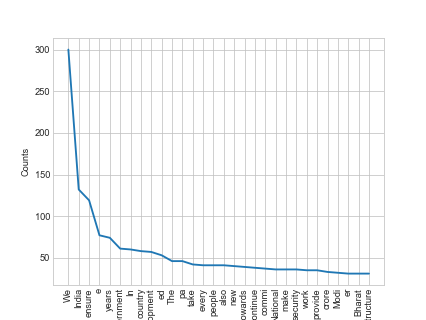

In [168]:
# Frequency Distribution Plot
#Top_Fun_recordcount_percentage.plot()
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-whitegrid')
fdist_bjp.plot(30,cumulative=False)
plt.show()

<IPython.core.display.Javascript object>


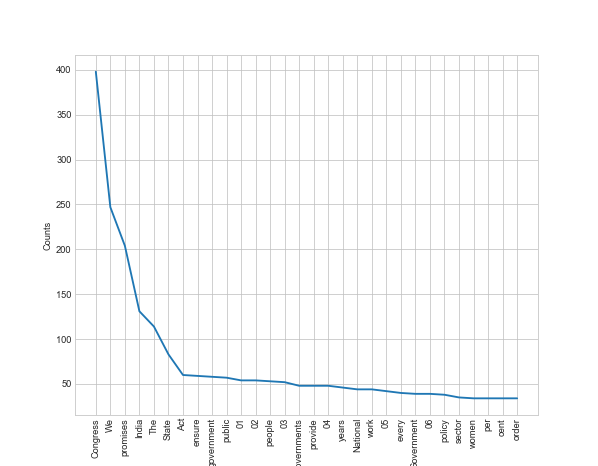

In [169]:
# Frequency Distribution Plot
#Top_Fun_recordcount_percentage.plot()
import matplotlib.pyplot as plt
%matplotlib notebook
plt.style.use('seaborn-whitegrid')
fdist_cong.plot(30,cumulative=False)
plt.show()

Generating Word Cloud plot

<IPython.core.display.Javascript object>


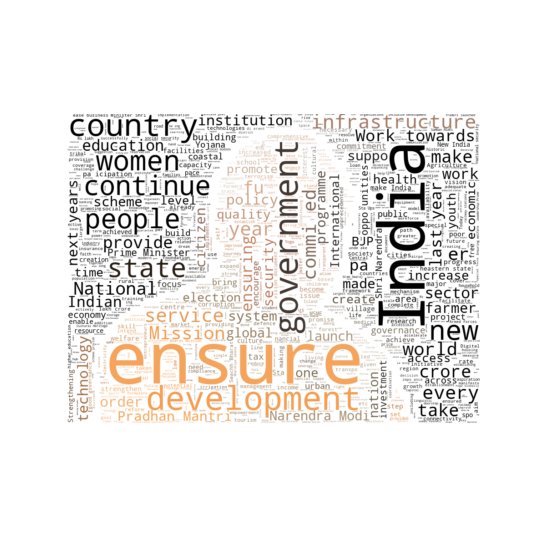

(-0.5, 909.5, 682.5, -0.5)

In [170]:
# Start with one review:
%matplotlib notebook

# Generate a word cloud image
mask = np.array(Image.open('modi.png'))

# Create and generate a word cloud image:
wordcloud = WordCloud(  max_words=1000, background_color="white",mode="RGBA", mask=mask).generate(text2_bjp)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud.recolor(color_func= image_colors), interpolation="bilinear")
plt.axis("off")

<IPython.core.display.Javascript object>


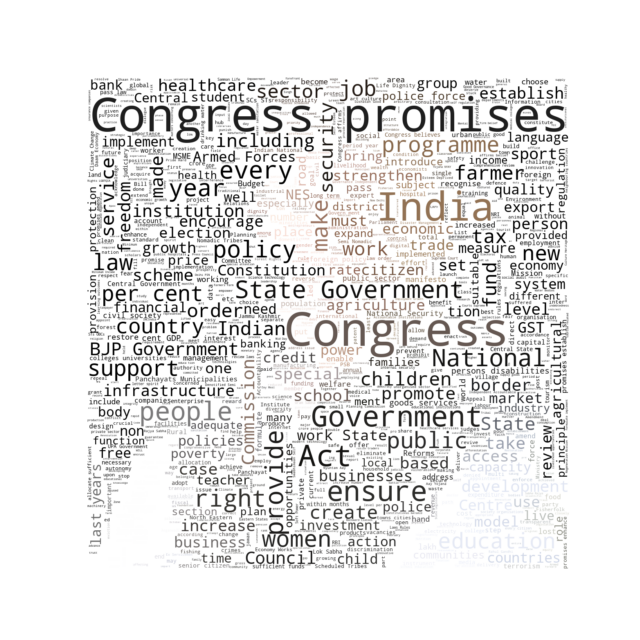

(-0.5, 1180.5, 1204.5, -0.5)

In [171]:
# Start with one review:
%matplotlib notebook
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
# Generate a word cloud image
mask = np.array(Image.open('rahul.png'))

# Create and generate a word cloud image:
wordcloud = WordCloud(  max_words=1000, background_color="white",mode="RGBA", mask=mask).generate(text2_cong)

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[8,8])
plt.imshow(wordcloud.recolor(color_func= image_colors), interpolation="bilinear")
plt.axis("off")

Lexical Dispersion Plot

<IPython.core.display.Javascript object>


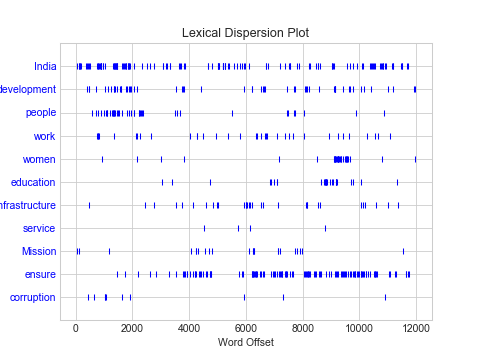

In [179]:
%matplotlib notebook
text3_bjp = nltk.Text(word_tokens_bjp)
text3_bjp.dispersion_plot(['India','development','people','work', 'women','education','infrastructure', 'service', 'Mission', 'ensure','corruption'])


<IPython.core.display.Javascript object>


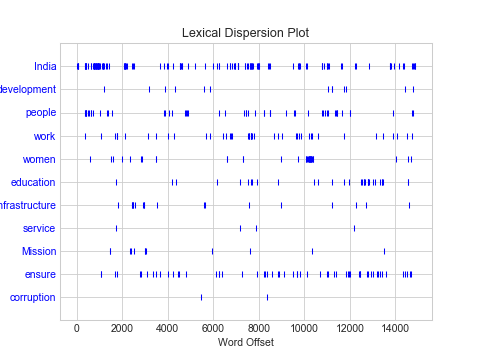

In [178]:
%matplotlib notebook
text3_cong= nltk.Text(word_tokens_cong)
text3_cong.dispersion_plot(['India','development','people','work', 'women','education','infrastructure', 'service', 'Mission', 'ensure','corruption'])



Pair words

In [180]:
text3_bjp.collocations() # Text that appers together

Pradhan Mantri; Prime Minister; Narendra Modi; last years; oppo
unities; Work towards; Shri Narendra; next years; Swachh Bharat; unde
ake; Samman Nidhi; Armed Forces; impo ance; Gram Swaraj; Kisan Samman;
Minister Shri; Jammu Kashmir; work towards; electri cation; Bharatiya
Janata


In [181]:
text3_cong.collocations() # Text that appers together

Congress promises; per cent; State Governments; Panchayats
Municipalities; Armed Forces; SCs STs; BJP Government; long term; work
State; Jammu Kashmir; North Eastern; cent GDP; Semi Nomadic; Nomadic
Tribes; civil society; persons disabilities; colleges universities;
sufficient funds; goods services; Lok Sabha


Context

In [182]:
print(text3_bjp.concordance('India')) # Displaying whereever India comes

Displaying 25 of 133 matches:
ll Expanding Irrigation Mission Mode India World 3rd Largest Economy Eliminatin
tolerance approach terrorism Make In India Shri Amit Shah Roadmap 5 trillion do
 Trade Infrastructure Foundation New India Ensuring Urban Development Swachh Bh
lopment Digital Connectivity Healthy India Determined India Health All Making H
onnectivity Healthy India Determined India Health All Making Healthcare Accessi
o unities Youth Yuva Bharat Tomorrow India Science Technology Ensuring Digni ed
 BJP comes seek valued blessings yet India continues unhindered path developmen
ric mandate bestowed upon us At time India challenges monumental economy doldru
pant There serious doubts minds many India ability ful dreams aspirations citiz
cay development pessimism positivity India No heast earlier made headlines bloc
truction roads railway lines doubled India e cient po 18 000 villages living da
freedom Let us together imagine kind India want 2047 The BJP pledges make next 
 next year

In [183]:
print(text3_cong.concordance('India')) # Displaying whereever India comes

Displaying 25 of 131 matches:
 NATIONAL CONGRESS Published The All India Congress Committee 24 Akbar Road New
he choice The 2019 elections crucial India future children future Appeal Let us
hildren future Appeal Let us rebuild India Together let us get India moving Det
us rebuild India Together let us get India moving Detailed plan action Kaam Daa
ons 2019 present stark choice people India Will India free democratic country I
esent stark choice people India Will India free democratic country Indian peopl
ree poverty free pursue ambitions Or India governed perni cious ideology trampl
 essence multi cultural country Will India able lift people tide growth get rid
t people tide growth get rid poverty India become country marked gross inequali
r The last 5 years disastrous people India Youth lost jobs Farmers lost hope Tr
ct prosperity people We promise make India strong united prosperous society Our
crores Indians It action plan future India You inspired manifesto It living man
upport vot

Lexical Richness

In [185]:
len(set(text3_bjp)) / len(text3_bjp) # Measuring the lexical richness of the text

0.28266112266112264

In [187]:
len(set(text3_cong)) / len(text3_cong) # Measuring the lexical richness of the text

0.2923407397462576

In [484]:
print( 'The word "India" appears',text3.count('India'))
print( 'The word "development" appears',text3.count('development'))
print( 'The word "security" appears',text3.count('security'))
print( 'The word "education" appears',text3.count('education'))
print( 'The word "agriculture" appears',text3.count('agriculture'))
print( 'The word "Hindus" appears',text3.count('Hindus'))
print( 'The word "Muslims" appears',text3.count('Muslims'))
print( 'The word "minority" appears',text3.count('minority'))
print( 'The word "reservation" appears',text3.count('reservation'))


The word "India" appears 132
The word "development" appears 57
The word "security" appears 36
The word "education" appears 27
The word "agriculture" appears 6
The word "Hindus" appears 1
The word "Muslims" appears 1
The word "minority" appears 1
The word "reservation" appears 4


In [188]:
#Finding long words
V = set(text3_bjp)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['Entrepreneurship',
 'administratively',
 'entrepreneurship',
 'industrialization',
 'transformational']

In [189]:
#Finding long words
V = set(text3_cong)
long_words = [w for w in V if len(w) > 15]
sorted(long_words)

['Entrepreneurship',
 'IndianNationalCongress',
 'disqualification',
 'entrepreneurship',
 'industrialisation',
 'instrumentalities',
 'parliamentarians',
 'responsibilities']

In [206]:
fdist_bjp = FreqDist(len(w) for w in text3_bjp) 


#print('Most Common word',fdist_bjp.most_common())
#print('')

print('Average Word length of BJP manifesto',fdist_bjp.max())
print('')
print('% of words with 5 letters in BJP manifesto',fdist_bjp.freq(5))
print('')

# From this we see that the most frequent word length is 5, and that words of length 5 account for roughly 13% of the words making up the manifesto. 


Average Word length of BJP manifesto 5

% of words with 5 letters in BJP manifesto 0.1392099792099792



In [207]:
fdist_cong = FreqDist(len(w) for w in text3_cong) 


print('Most Common word',fdist_cong.most_common())
print('')

print('Average Word length of Congress manifesto',fdist_cong.max())
print('')
print('% of words with 6 letters in Congress manifesto',fdist_cong.freq(5))
print('')

# From this we see that the most frequent word length is 5, and that words of length 5 account for roughly 13% of the words making up the manifesto. 


Most Common word [(6, 2050), (8, 2020), (5, 1881), (7, 1807), (4, 1545), (2, 1173), (9, 1135), (3, 968), (10, 960), (11, 540), (12, 290), (1, 226), (13, 161), (14, 111), (15, 17), (16, 7), (22, 4), (17, 2)]

Average Word length of Congress manifesto 6

% of words with 6 letters in Congress manifesto 0.1262670336309324



In [201]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
analyser.polarity_scores(text2_bjp) # Sentiment score

{'neg': 0.05, 'neu': 0.75, 'pos': 0.2, 'compound': 1.0}

In [209]:
analyser.polarity_scores(text2_cong) # Sentiment score

{'neg': 0.038, 'neu': 0.805, 'pos': 0.157, 'compound': 1.0}

In [208]:
sentiment_valence(text2_cong)

NameError: name 'sentiment_valence' is not defined

In [202]:
from pattern.en import parse,sentiment
for sentence in text2_bjp.split("."):
    print (sentiment(sentence))

(0.09828529956482714, 0.3532285300001832)


In [203]:
from pattern.en import parse,sentiment
for sentence in text2_cong.split("."):
    print (sentiment(sentence))

(0.09516632982771321, 0.39224337662017744)


In [205]:
#

(0.10104499814373932, 0.36455713182699784)
(0.10104499814373932, 0.36455713182699784)
polarities:  [0.101045]
subjectivities:  [0.36455713]


<IPython.core.display.Javascript object>


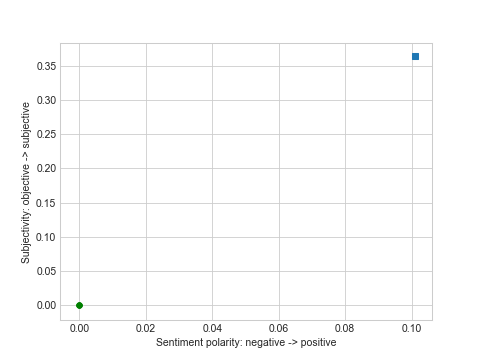

In [527]:
from pattern.en import parse,sentiment

sentences = [text1]

complete_text = " ".join(sentences)


for sentence in sentences:
    print (sentiment(sentence))

#mind the difference for the last sentence, which contains two dots.         
for sentence in complete_text.split("."):
    print (sentiment(sentence))


import numpy as np
import matplotlib.pyplot as plt

a = np.array([ sentiment(sentence) for sentence in complete_text.split(".") ])

print ("polarities: ", a[:,0])
print ("subjectivities: ", a[:,1])

############ Plotting ############
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(a[:,0], a[:,1], marker="s", linestyle="")
ax.set_xlabel("polarity")
ax.set_ylabel("subjectivity")
plt.show()